### Multilayer Perceptron

In [1]:
# install.packages("neuralnet")
library(neuralnet)

In [2]:
myiris = iris
myiris = cbind(myiris, myiris$Species=="setosa")
myiris = cbind(myiris, myiris$Species=="versicolor")
myiris = cbind(myiris, myiris$Species=="virginica")
head(myiris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,"myiris$Species == ""setosa""","myiris$Species == ""versicolor""","myiris$Species == ""virginica"""
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>,<lgl>,<lgl>
1,5.1,3.5,1.4,0.2,setosa,TRUE,FALSE,FALSE
2,4.9,3.0,1.4,0.2,setosa,TRUE,FALSE,FALSE
3,4.7,3.2,1.3,0.2,setosa,TRUE,FALSE,FALSE
4,4.6,3.1,1.5,0.2,setosa,TRUE,FALSE,FALSE
5,5.0,3.6,1.4,0.2,setosa,TRUE,FALSE,FALSE
6,5.4,3.9,1.7,0.4,setosa,TRUE,FALSE,FALSE


In [3]:
summary(myiris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species   myiris$Species == "setosa" myiris$Species == "versicolor"
 setosa    :50   Mode :logical              Mode :logical                 
 versicolor:50   FALSE:100                  FALSE:100                     
 virginica :50   TRUE :50                   TRUE :50                      
                                                                          
                                                                          
                                                                          
 myiris$Species == "

In [4]:
names(myiris)[6] = "setosa"
names(myiris)[7] = "versicolor"
names(myiris)[8] = "virginica"
names(myiris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"     
[6] "setosa"       "versicolor"   "virginica"

In [5]:
summary(myiris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species     setosa        versicolor      virginica      
 setosa    :50   Mode :logical   Mode :logical   Mode :logical  
 versicolor:50   FALSE:100       FALSE:100       FALSE:100      
 virginica :50   TRUE :50        TRUE :50        TRUE :50       
                                                                
                                                                
                                                                

In [6]:
amostra = sample(2,150,replace=T,prob=c(0.7,0.3))

In [7]:
myiristreino = myiris[amostra==1,]
myiristeste = myiris[amostra==2,]

print("Total")
dim(myiris)

print("Treino")
dim(myiristreino)

print("Teste")
dim(myiristeste)

[1] "Total"


[1] 150   8

[1] "Treino"


[1] 109   8

[1] "Teste"


[1] 41  8

In [8]:
modelo = neuralnet(setosa + versicolor + virginica ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, data=myiristreino, hidden=c(5,4))

In [9]:
modelo

$call
neuralnet(formula = setosa + versicolor + virginica ~ Sepal.Length + 
    Sepal.Width + Petal.Length + Petal.Width, data = myiristreino, 
    hidden = c(5, 4))

$response
    setosa versicolor virginica
1     TRUE      FALSE     FALSE
2     TRUE      FALSE     FALSE
3     TRUE      FALSE     FALSE
4     TRUE      FALSE     FALSE
6     TRUE      FALSE     FALSE
7     TRUE      FALSE     FALSE
9     TRUE      FALSE     FALSE
11    TRUE      FALSE     FALSE
12    TRUE      FALSE     FALSE
13    TRUE      FALSE     FALSE
14    TRUE      FALSE     FALSE
15    TRUE      FALSE     FALSE
17    TRUE      FALSE     FALSE
19    TRUE      FALSE     FALSE
20    TRUE      FALSE     FALSE
21    TRUE      FALSE     FALSE
22    TRUE      FALSE     FALSE
23    TRUE      FALSE     FALSE
24    TRUE      FALSE     FALSE
25    TRUE      FALSE     FALSE
26    TRUE      FALSE     FALSE
27    TRUE      FALSE     FALSE
29    TRUE      FALSE     FALSE
31    TRUE      FALSE     FALSE
32    TRUE      FALSE  

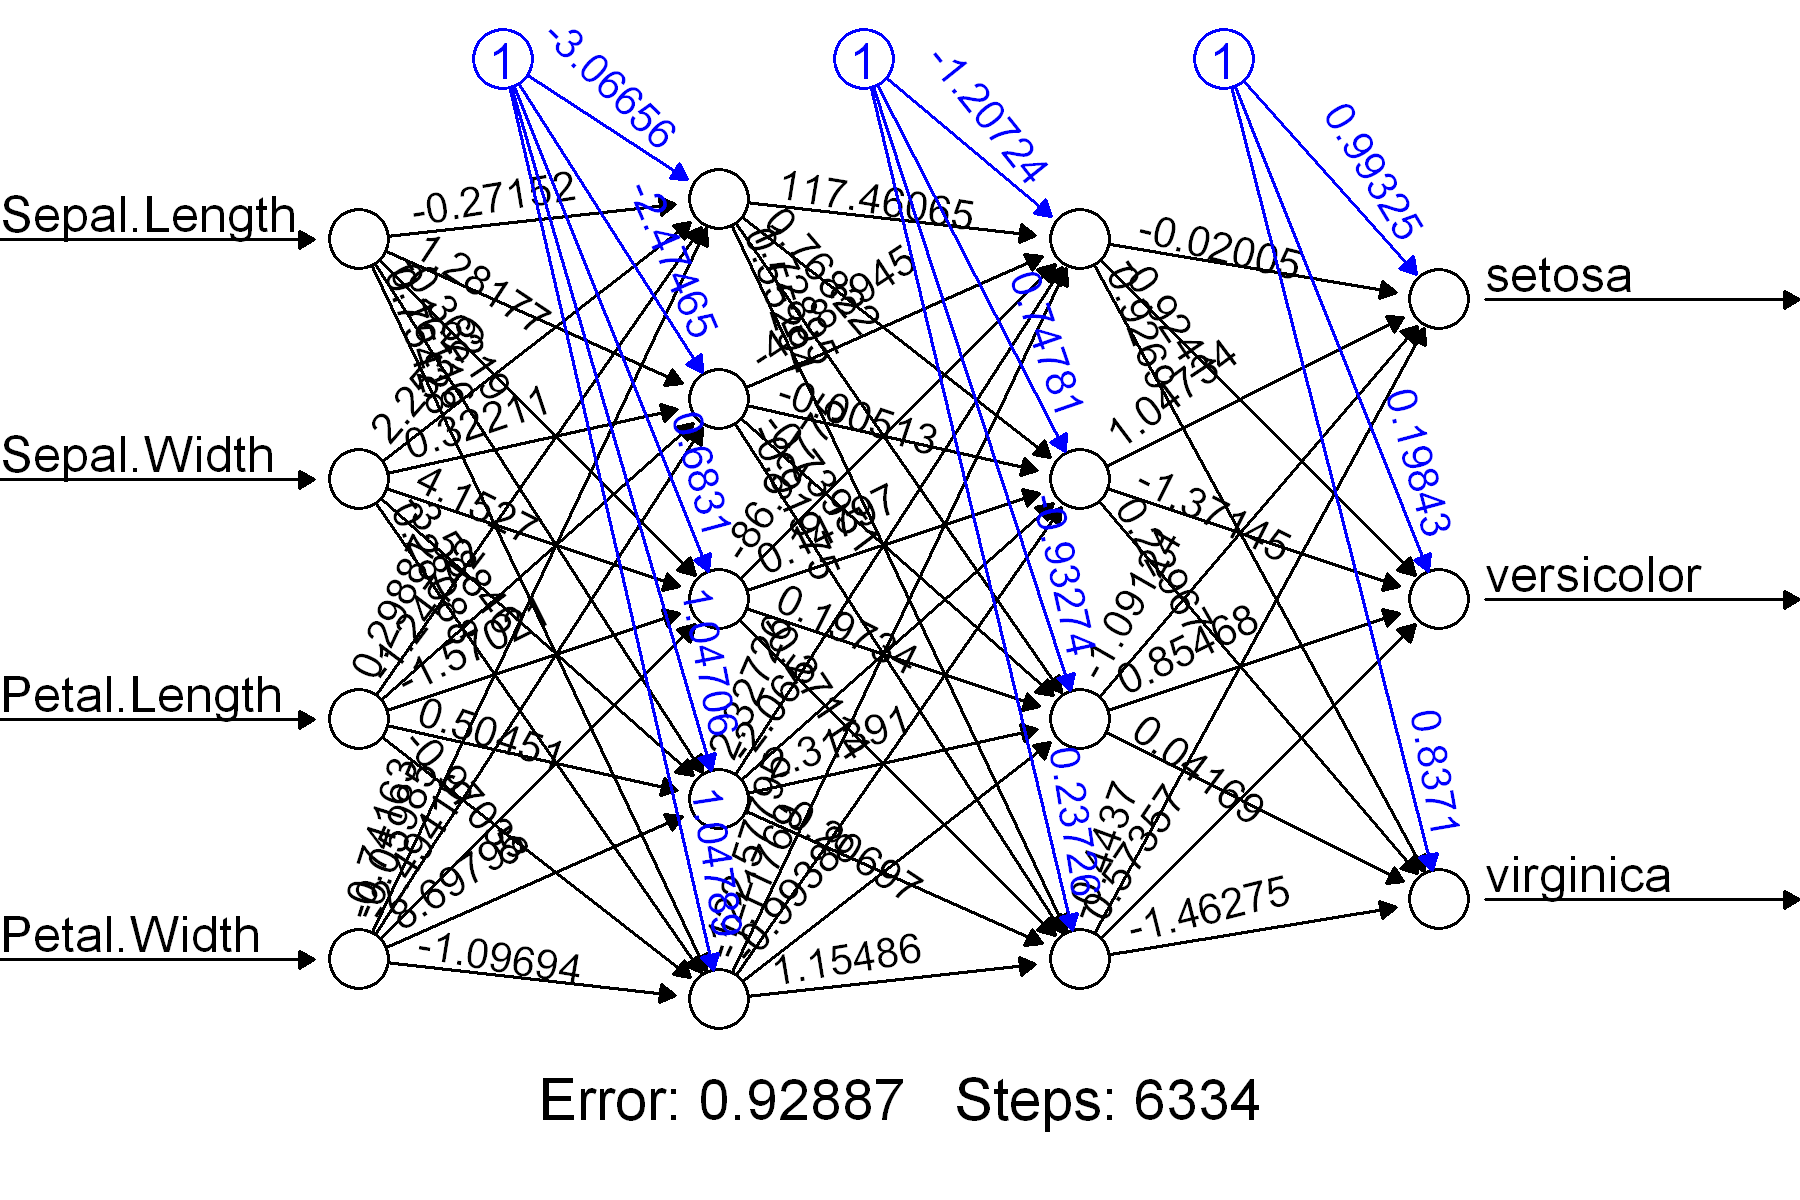

In [10]:
options(repr.plot.width=6, repr.plot.height=4, repr.plot.res=300)
plot(modelo, rep="best")

In [11]:
teste = compute(modelo, myiristeste[,1:4])
teste$net.result

5,0.999001914,-6.044217e-04,-0.0005291831
8,0.999965413,-7.773432e-04,-0.0003664303
10,1.003242844,-1.566018e-03,-0.0002664911
16,1.000083096,-2.493126e-03,0.0017986159
18,1.001392834,-2.165833e-03,0.0015042168
28,1.001125671,-1.941956e-03,0.0008306476
30,0.995838457,3.193232e-03,-0.0043336318
33,0.997319309,9.575144e-05,-0.0011732290
40,1.001257426,-1.712946e-03,0.0005789327
42,1.010313607,1.729817e-02,0.0197244631
48,0.997902240,1.824647e-03,-0.0031507603


In [12]:
resultado = as.data.frame(teste$net.result)
names(resultado)[1] = "setosa"
names(resultado)[2] = "versicolor"
names(resultado)[3] = "virginica"
names(resultado)
head(resultado)

[1] "setosa"     "versicolor" "virginica"

,setosa,versicolor,virginica
,<dbl>,<dbl>,<dbl>
5,0.9990019,-0.0006044217,-0.0005291831
8,0.9999654,-0.0007773432,-0.0003664303
10,1.0032428,-0.0015660182,-0.0002664911
16,1.0000831,-0.0024931256,0.0017986159
18,1.0013928,-0.0021658327,0.0015042168
28,1.0011257,-0.0019419559,0.0008306476


In [13]:
resultado$class = colnames(resultado[,1:3])[max.col(resultado[,1:3],ties.method="first")]

In [14]:
resultado

,setosa,versicolor,virginica,class
,<dbl>,<dbl>,<dbl>,<chr>
5,0.999001914,-6.044217e-04,-0.0005291831,setosa
8,0.999965413,-7.773432e-04,-0.0003664303,setosa
10,1.003242844,-1.566018e-03,-0.0002664911,setosa
16,1.000083096,-2.493126e-03,0.0017986159,setosa
18,1.001392834,-2.165833e-03,0.0015042168,setosa
28,1.001125671,-1.941956e-03,0.0008306476,setosa
30,0.995838457,3.193232e-03,-0.0043336318,setosa
33,0.997319309,9.575144e-05,-0.0011732290,setosa
40,1.001257426,-1.712946e-03,0.0005789327,setosa


In [15]:
confusao = table(resultado$class, myiristeste$Species)
confusao

            
             setosa versicolor virginica
  setosa         12          0         0
  versicolor      0         15         0
  virginica       0          0        14

In [16]:
sum(diag(confusao)) * 100 / sum(confusao)

[1] 100